## H-G phase function  @python 3.8


In [14]:
#import
import numpy as np
import matplotlib.pyplot as plt
import math as mh 
import pandas as pd
from tqdm import tqdm
import os
Hv = 22
G  = 0.15

In [86]:
A1,A2 = 3.332,1.862
B1,B2 = 0.631,1.218
C1,C2 = 0.986,0.238
def calW(alpha):
    return np.exp(-90.56*np.tan(alpha/2)**2)
def calphiiS(i,alpha):
    Ci = C1
    if i == 2 :
        Ci = C2
    aa = 0.119+1.341*np.sin(alpha)-0.754*np.sin(alpha)**2
    return 1-Ci*np.sin(alpha)/aa
def calphiiL(i,alpha):
    Ai = A1
    Bi = B1
    if i == 2 :
        Ai = A2
        Bi = B2
    return np.exp(-Ai*np.tan(alpha/2)**Bi)
def calphii(i,alpha):
    W = calW(alpha)
    return W*calphiiS(i,alpha)+(1-W)*calphiiL(i,alpha)
def calHalpha(alpha,G,H):
    aa = (1-G)*calphii(1,alpha)+G*calphii(2,alpha)
    return H - 2.5*np.log10(aa)
def calpromixHalpha(alpha,G,H):
    
    #print(f'phiL1={calphiiL(1,alpha)}')
    #print(f'phiL2={calphiiL(2,alpha)}')
    aa = (1-G)*calphiiL(1,alpha)+G*calphiiL(2,alpha)
    return H - 2.5*np.log10(aa)
    

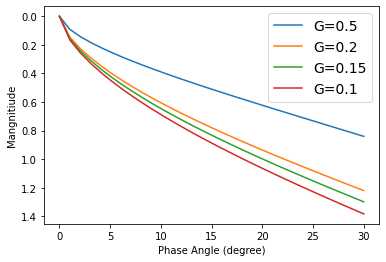

In [88]:
alpha_degree = np.linspace(0,30,30)
alpha = alpha_degree/180*np.pi
ax = plt.gca()
ax.invert_yaxis()
Hv = 0
plt.plot(alpha_degree,calpromixHalpha(alpha,0.5,Hv),label = 'G=0.5')
plt.plot(alpha_degree,calpromixHalpha(alpha,0.2,Hv),label = 'G=0.2')
plt.plot(alpha_degree,calpromixHalpha(alpha,0.15,Hv),label = 'G=0.15')
plt.plot(alpha_degree,calpromixHalpha(alpha,0.1,Hv),label = 'G=0.1')
plt.legend(fontsize=14)
plt.xlabel("Phase Angle (degree)")
plt.ylabel("Mangnitiude");


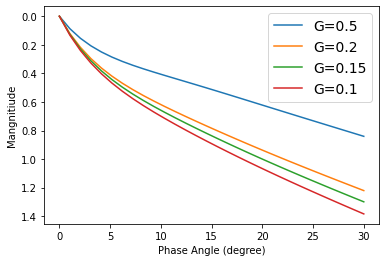

In [89]:
alpha_degree = np.linspace(0,30,30)
alpha = alpha_degree/180*np.pi
ax = plt.gca()
ax.invert_yaxis()
plt.plot(alpha_degree,calHalpha(alpha,0.5,0),label = 'G=0.5')
plt.plot(alpha_degree,calHalpha(alpha,0.2,0),label = 'G=0.2')
plt.plot(alpha_degree,calHalpha(alpha,0.15,0),label = 'G=0.15')
plt.plot(alpha_degree,calHalpha(alpha,0.1,0),label = 'G=0.1')
plt.legend(fontsize=14)
plt.xlabel("Phase Angle (degree)")
plt.ylabel("Mangnitiude");
